In [1]:
from Functions import *
import tensorflow as tf
import scipy
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential

import glob
from keras import models
#from ann_visualizer.visualize import ann_viz;
import pickle as pkl
import numpy as np
import pandas as pd #more libraries and modules
import matplotlib.pyplot as plt
import six
np.random.seed(123)
# from tf_cnnvis import deepdream_visualization
import splitfolders
import seaborn as sns
from keract import get_activations, display_activations,display_heatmaps,get_gradients_of_activations
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn import metrics
import itertools
import numpy as np
import pandas as pd #more libraries and modules
import matplotlib.pyplot as plt
import six
from sklearn import metrics
import numpy as np

import matplotlib as mpl

import IPython.display as display
import PIL.Image

from tensorflow.keras.preprocessing import image


np.random.seed(123)
plt.style.use('seaborn')

In [2]:
# get the data
filname = 'fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('fer2013.csv',names=names)
im=df['pixels']
df.head(10)
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)
N, D = X.shape
X = X.reshape(N, 48, 48, 1)
cascade = load_cascade_classifier_xml()
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)
path_model='model_filter.h5' # save model at this location after each epoch
model=my_model() # create the model
model.load_weights(path_model)

7
(35887, 48, 48, 1)


In [3]:
def deprocess(img):
    img = 255*(img + 1.0)/2.0
    return tf.cast(img, tf.float32)

# Display an image
def show(img):
    display.display(PIL.Image.fromarray(np.array(tf.cast(img, tf.uint8))))
# Create the feature extraction model
    
def calc_loss(img, model):
  # Pass forward the image through the model to retrieve the activations.
  # Converts the image into a batch of size 1.
    img_batch = tf.expand_dims(img, axis=0)
    layer_activations = model(img_batch)
    if len(layer_activations) == 1:
        layer_activations = [layer_activations]

    losses = []
    for act in layer_activations:
        loss = tf.math.reduce_mean(act)
        losses.append(loss)

    return  tf.reduce_sum(losses)
class DeepDream(tf.Module):
    def __init__(self, model):
        self.model = model

#     @tf.function(
#         input_signature=(
#         tf.TensorSpec(shape=[None,None,1], dtype=tf.float32),
#         tf.TensorSpec(shape=[], dtype=tf.int32),
#         tf.TensorSpec(shape=[], dtype=tf.float32),))
    def __call__(self, img, steps, step_size):
        print("Tracing")
        loss = tf.constant(0.0)
        for n in tf.range(steps):
            with tf.GradientTape() as tape:
                # This needs gradients relative to `img`
          # `GradientTape` only watches `tf.Variable`s by default
                tape.watch(img)
                loss = calc_loss(img, self.model)

        # Calculate the gradient of the loss with respect to the pixels of the input image.
                gradients = tape.gradient(loss, img)

        # Normalize the gradients.
                gradients = gradients*tf.math.reduce_std(gradients) + 1e-8 
        
        # In gradient ascent, the "loss" is maximized so that the input image increasingly "excites" the layers.
        # You can update the image by directly adding the gradients (because they're the same shape!)
                img = img + gradients*step_size
                show(img)
                print("Step {}, loss {}".format(step_size, loss))

#                 img = tf.clip_by_value(img, -1, 1)

        return loss, img
def run_deep_dream_simple(img, steps=100, step_size=0.01):
      # Convert from uint8 to the range expected by the model.
    img = tf.convert_to_tensor(img)
    step_size = tf.convert_to_tensor(step_size)
    steps_remaining = steps
    step = 0
    while steps_remaining:
        if steps_remaining>100:
            run_steps = tf.constant(100)
        else:
            run_steps = tf.constant(steps_remaining)
        steps_remaining -= run_steps
        step += run_steps
    
        loss, img = deepdream(img, run_steps, tf.constant(step_size))
    
        display.clear_output(wait=True)
        show(img)
        print ("Step {}, loss {}".format(step, loss))


        result = img
        display.clear_output(wait=True)
        show(result)

    return result
def generatedeepdreamimg(imagebatch,model,imageposinbatch):
    base_model = model

    names = [name.name for name in  base_model.layers]
    layers = [base_model.get_layer(name).output for name in names[:]]

# Create the feature extraction model
    dream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)

    original_img = np.array(imagebatch)
    original_img = original_img[imageposinbatch]
    original_img = ((original_img)).astype(np.float32)
    dream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)

# show(deprocess(original_img))
    deepdream = DeepDream(dream_model)
    dream_img = run_deep_dream_simple(img=original_img, 
                                  steps=1000, step_size=0.5)
    return dream_img

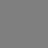

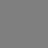

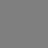

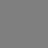

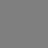

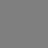

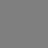

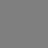

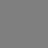

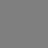

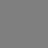

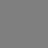

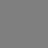

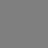

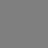

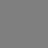

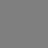

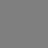

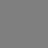

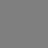

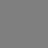

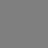

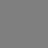

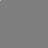

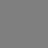

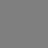

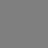

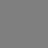

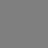

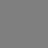

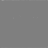

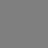

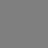

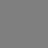

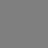

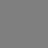

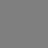

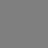

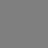

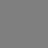

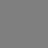

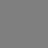

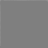

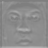

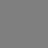

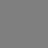

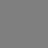

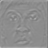

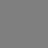

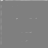

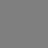

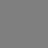

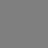

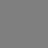

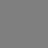

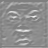

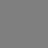

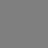

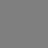

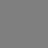

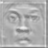

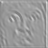

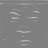

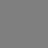

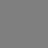

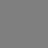

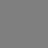

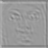

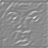

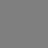

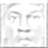

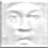

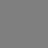

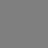

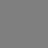

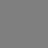

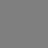

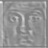

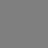

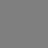

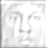

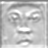

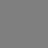

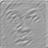

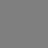

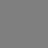

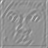

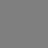

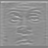

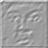

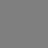

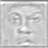

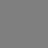

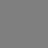

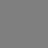

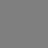

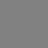

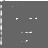

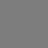

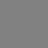

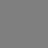

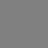

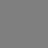

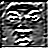

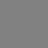

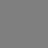

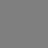

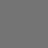

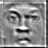

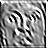

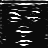

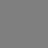

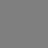

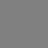

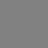

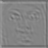

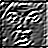

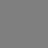

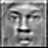

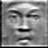

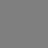

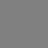

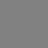

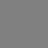

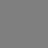

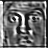

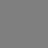

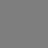

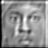

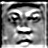

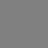

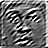

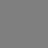

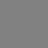

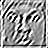

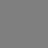

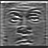

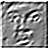

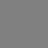

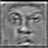

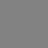

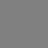

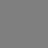

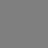

IndexError: too many indices for array

In [24]:
base_model = model

names = [name.name for name in  base_model.layers]
layers = [base_model.get_layer(name).output for name in names[:]]

# Create the feature extraction model
dream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)
pickedpic= X_train[4:5]
d = DeepDream(base_model)
for ii in range(len(dream_model.predict(pickedpic))):
    for i in range(len(dream_model.predict(pickedpic)[ii][0,:,:,:])):
        show(deprocess(dream_model.predict(pickedpic)[ii][0,:,:,i]))

In [26]:
pickedpic[0,:,:,0].shape
pickedpic = deprocess(pickedpic)

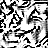

In [29]:
deepdream = DeepDream(dream_model)
x = run_deep_dream_simple(pickedpic[0,:,:,0],steps = 5000,step_size=10.0)

imagine a vector field

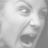

In [23]:
show(pickedpic[0,:,:,0])